# About and Summary

Author: Shivam Swarnkar

### Part I Finding Best Airlines
**Task**
- Given latness in arrival of various flights of different Airlines, find the airlines which has the best chance of being on time. 
-  [Dataset](https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/formatted_flights.csv)
    - Entries: 317113
    - Data Columns
        - arr_delay: delay in arrival (minutes)
            - negetive values indicate early arrivals
        - name: Airline name (str)
            - Total 16 unique names


**Method Used**
- Ploted Density plot with hist=True
- Initially, with 16 airlines, Density plot was hard to read
- Calculated MSE and selected 5 airlines with lowest MSE (Hawaiian Airlines had lowest MSE)
- Then compared those 5 airlines using Density plot (Alaska Airlines had the highest chance of being on time)

**Result**
- **Alaska Airlines (winner)**
    - Pros
        + Density plot is to the left, has the **highest chance of being on time**
        + Second Lowest MSE
    - Cons
        - Have less than 1000 entries. Possibly biased/skewd data
        
        
        
- American Airlines (**reliable, given more than 10k entries**)
    - Pros
        + Out of all airlines **with more than 10k entries, has the highest chance of being on time**
        + 6th lowest MSE 
    - Cons
        - Neither the lowest MSE nor has the highest chance of being on time, out of every given airlines
        
        
        
- Hawaiian Airlines
    - Pros
        + **Lowest MSE**
        + Density plot is mostly to the left, has the **second highest chance of being on time**
    - Cons
        - Have less than 500 entries. Possibly biased/skewd data

### Part II Central Limit Theorem
**Task**
- Examine and observe if four rules of Central limit theorem works for the airline dataset. 


**Method used**
- Data Visulaization (histogram, density plot)
- Numerical Calculations (sampling, range, spread, sigma, mean)

**Results**
- All four rules were succesfully examined through visual and numerical observations. [Read below for individual observations.](#Part-II-Central-Limit-Theorem) 

# Dependencies 

In [ ]:
!pip install seaborn
!pip install pandas
!pip install matplotlib

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

# Getting Data

In [3]:
file_url = 'https://media.githubusercontent.com/media/WillKoehrsen/Data-Analysis/master/univariate_dist/data/formatted_flights.csv'
file_path = 'formatted_flights.csv'

In [4]:
#reading file from url
#flights = pd.read_csv(file_url, index_col =0) 

#reading file from local dir
flights = pd.read_csv(file_path)
flights.head()

,arr_delay,name
0,11.0,United Air Lines Inc.
1,20.0,United Air Lines Inc.
2,33.0,American Airlines Inc.
3,-18.0,JetBlue Airways
4,-25.0,Delta Air Lines Inc.


# Part I Finding Best Airlines

## Looking into Data 

In [178]:
flights.describe()

,arr_delay
count,317113.000000
mean,1.297143
std,29.064401
min,-60.000000
25%,-17.000000
50%,-6.000000
75%,11.000000
max,120.000000


In [148]:
flights.groupby('name').describe()

arr_delay                                          \
                                count       mean        std   min   25%   50%   
name                                                                            
AirTran Airways Corporation    3021.0  10.543860  27.837712 -44.0  -8.0   4.0   
Alaska Airlines Inc.            689.0 -11.878084  29.566533 -60.0 -31.0 -18.0   
American Airlines Inc.        31197.0  -3.985960  28.257029 -60.0 -22.0 -10.0   
Delta Air Lines Inc.          46468.0  -3.246191  26.723283 -60.0 -20.0  -9.0   
Endeavor Air Inc.             16578.0  -0.261913  31.999876 -60.0 -21.0  -9.0   
Envoy Air                     24327.0   5.816171  28.647428 -53.0 -13.0  -2.0   
ExpressJet Airlines Inc.      48641.0   7.548858  32.121061 -58.0 -14.0  -2.0   
Frontier Airlines Inc.          639.0   9.932707  28.819950 -47.0 -10.0   4.0   
Hawaiian Airlines Inc.          332.0 -11.608434  23.604822 -60.0 -27.0 -13.0   
JetBlue Airways               52267.0   3.902175  28.990325 -60.0 -15.0  -4.0   
Mesa Airlines Inc.              513.0   5.629630  32.347166 -46.0 -17.0  -5.0   
SkyWest Airlines Inc.            27.0   1.814815  31.552200 -26.0 -16.0  -8.0   
Southwest Airlines Co.        11588.0   2.522351  28.084498 -58.0 -15.0  -4.0   
US Airways Inc.               19547.0  -0.471070  23.943063 -60.0 -15.0  -6.0   
United Air Lines Inc.         56359.0  -0.805461  28.096723 -60.0 -19.0  -7.0   
Virgin America                 4920.0  -5.178252  28.641181 -60.0 -23.0 -10.0   

                                          
                              75%    max  
name                                      
AirTran Airways Corporation  20.0  120.0  
Alaska Airlines Inc.          1.0  119.0  
American Airlines Inc.        6.0  120.0  
Delta Air Lines Inc.          6.0  120.0  
Endeavor Air Inc.            11.0  120.0  
Envoy Air                    15.0  120.0  
ExpressJet Airlines Inc.     20.0  120.0  
Frontier Airlines Inc.       23.0  118.0  
Hawaiian Airlines Inc.        2.0   83.0  
JetBlue Airways              14.0  120.0  
Mesa Airlines Inc.           18.0  114.0  
SkyWest Airlines Inc.         3.0  107.0  
Southwest Airlines Co.       12.0  120.0  
US Airways Inc.               7.0  120.0  
United Air Lines Inc.        10.0  120.0  
Virgin America                5.0  120.0

Text(0,0.5,'Density')

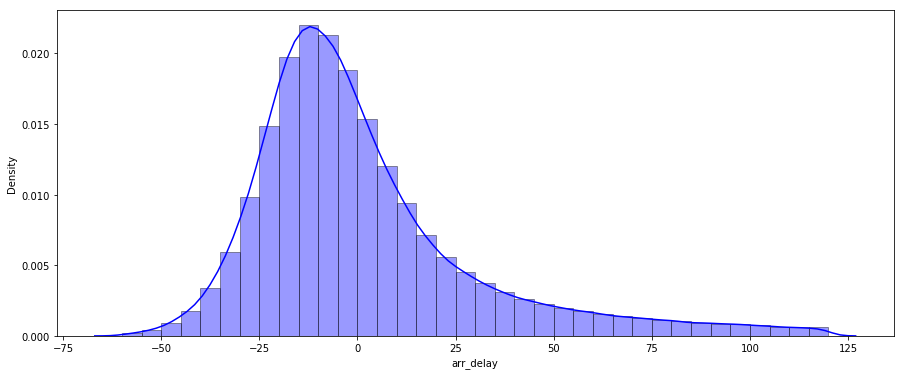

In [52]:
#Since max-min =180, bins=180/binwidth

#plot using matplotlib
#flights['arr_delay'].plot(kind='hist', bins=int(180/5), color='blue', edgecolor='black', figsize=(15,6))

#plot using seaborn
plt.figure(figsize=(15,6))
sns.distplot(flights['arr_delay'], 
            bins=int(180/5), 
            color='blue', 
            hist_kws={'edgecolor':'black'}, 
            hist=True, 
            kde=True )

plt.ylabel('Density')

## Ploting Individual Histograms

In [77]:
##Uncomment following to plot histogram for individual airlines

#airlines = flights.name.unique()
#ncolms = 2
#nrows= len(airlines)//2  #use math.ceil
#
#plt.figure(figsize=(20,50))
#for i, airline in enumerate(airlines):
#    ax0 = plt.subplot(nrows, ncolms, i+1)
#    ax0.hist(flights[flights['name']==airline]['arr_delay'],
#             bins=180//5,
#             color='blue',
#             edgecolor='black'
#            )
#    ax0.set_title(airline)


## Combined Density Plot

In [195]:
#plots density plot of given airlines
def density_plot(flights, airlines, size=(20,8), is_hist=False, shade=True):
    
    plt.figure(figsize=size)
    for airline in airlines:
        sns.distplot(flights[flights['name']==airline]['arr_delay'],
                     hist=is_hist,
                     kde=True,
                     kde_kws={'shade':shade, 'linewidth':3},
                     label=airline,
                    )
    
    #plot formatting
    plt.legend(prop={'size': 10}, title = 'Airline')
    plt.title('Density Plot with Multiple Airlines')
    plt.ylabel('Density')
    plt.xlabel('Delay (min)')
    plt.show()

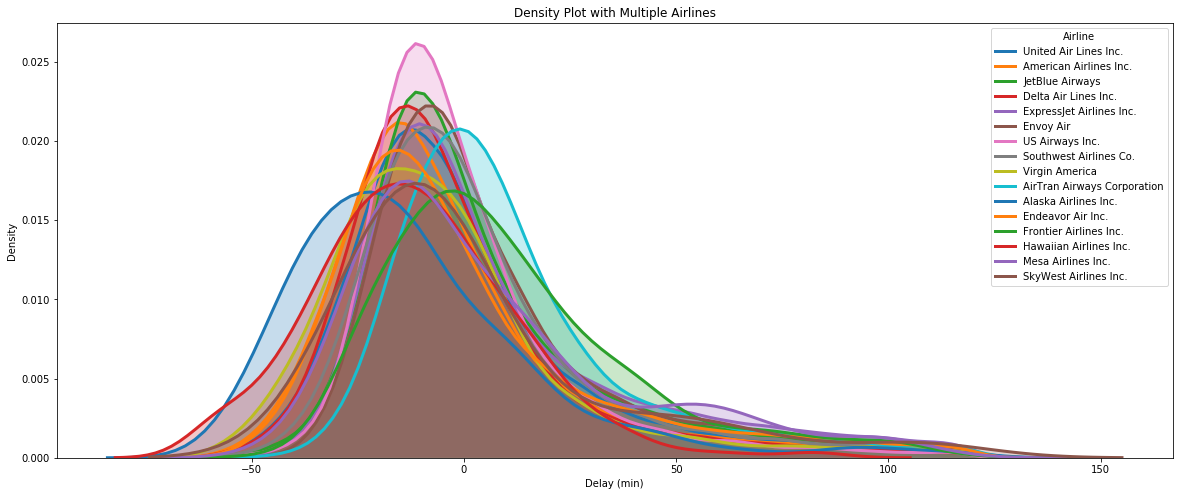

In [196]:
airlines = flights.name.unique()
density_plot(flights, airlines)

### Observation

- **Problem**
    - Above density plot contains way too many airlines, thus it's hard to interpret.
- **Solution**
    - Select top 3 airlines with best scores, and then plot the density score. 
    - We will select values based on wieghted scores described in Summary Section

## Calculating MSE to select Top 5 Airlines

In [203]:
#clamping the latness with minimum of zero
flights_copy = flights.copy(deep=True)
flights_copy.loc[flights_copy['arr_delay']<0, 'arr_delay'] = 0

#getting squred mean
flights_copy['squred_arr_delay'] = flights_copy['arr_delay']**2
airlines_scores = flights_copy.groupby('name').mean()
airlines_scores.columns = [ 'mean', 'squared_mean']
airlines_scores['count'] = flights_copy.groupby('name').count().arr_delay
del flights_copy

#sorting airlines using squred_mean
airlines_scores.sort_values(by='squared_mean', inplace=True)
print(airlines_scores)

                                  mean  squared_mean  count
name                                                       
Hawaiian Airlines Inc.        4.780120    155.256024    332
Alaska Airlines Inc.          6.931785    394.415094    689
US Airways Inc.               8.265719    402.060981  19547
Delta Air Lines Inc.          8.332659    440.592494  46468
Virgin America                8.265041    467.762602   4920
American Airlines Inc.        8.727249    481.633939  31197
United Air Lines Inc.         9.929417    524.733938  56359
Southwest Airlines Co.       11.144287    605.898861  11588
JetBlue Airways              12.168271    683.596438  52267
Endeavor Air Inc.            11.738810    714.991555  16578
Envoy Air                    12.920911    720.834752  24327
SkyWest Airlines Inc.        11.444444    793.074074     27
AirTran Airways Corporation  15.180073    806.998014   3021
Frontier Airlines Inc.       15.758998    813.815336    639
Mesa Airlines Inc.           14.822612  

## Density Plot of 5 Airlines with lowest MSE

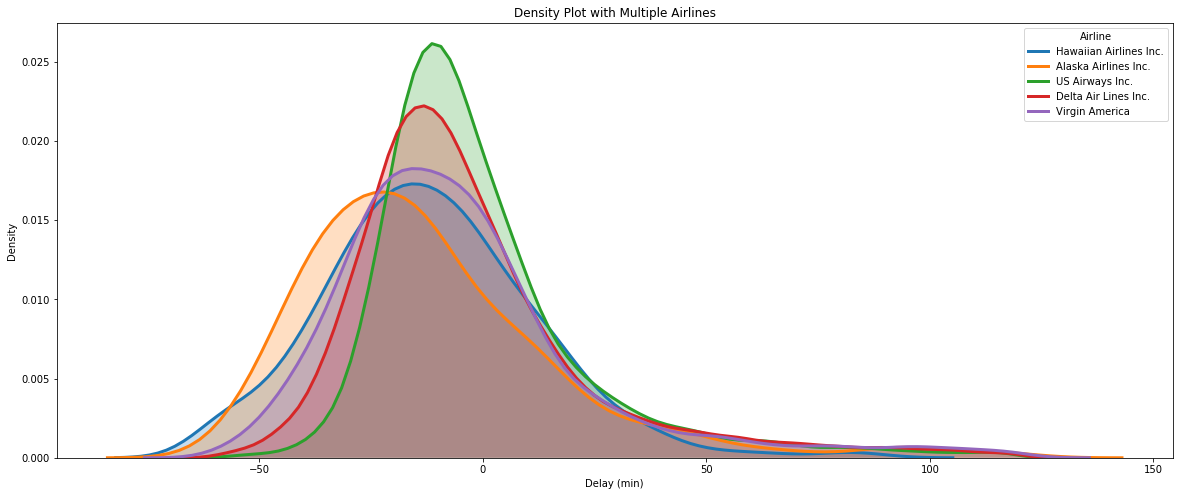

In [394]:
top_airlines = airlines_scores[:5] #Top five airlines with lowest MSE
airlines = list(top_airlines.index)
density_plot(flights, airlines)

### Observation
- Alaska Airlines Inc. tends to be earlier more often than others [Mostly left]

- **Problem**
    - Some of the selected Airlines don't have significant amounts of entires, which can present bias
- **Solution**
    - Drop airlines which have less than 10k entries

                               mean  squared_mean  count
name                                                    
US Airways Inc.            8.265719    402.060981  19547
Delta Air Lines Inc.       8.332659    440.592494  46468
American Airlines Inc.     8.727249    481.633939  31197
United Air Lines Inc.      9.929417    524.733938  56359
Southwest Airlines Co.    11.144287    605.898861  11588
JetBlue Airways           12.168271    683.596438  52267
Endeavor Air Inc.         11.738810    714.991555  16578
Envoy Air                 12.920911    720.834752  24327
ExpressJet Airlines Inc.  15.243992    933.488682  48641


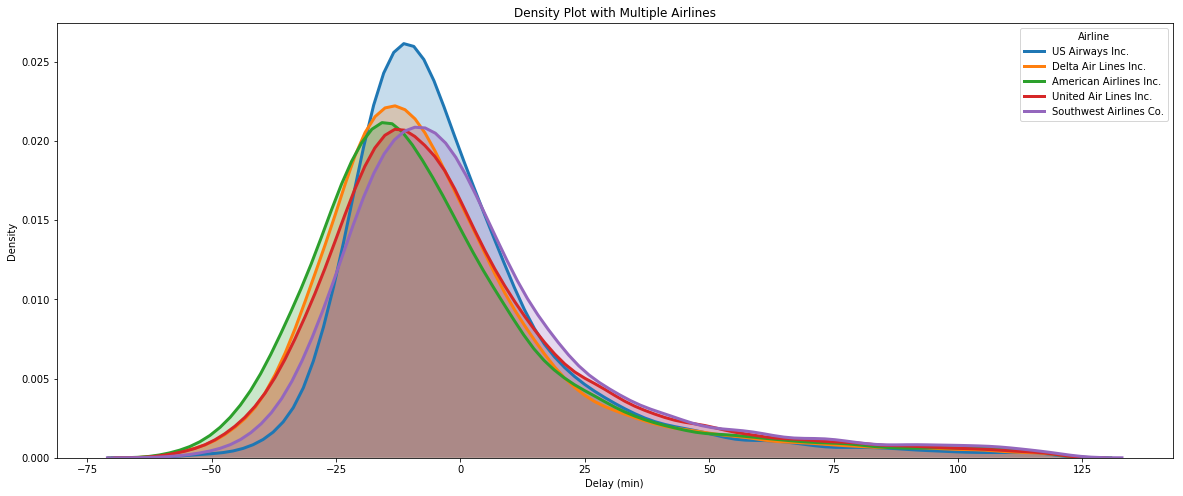

In [392]:
#droping entries with less than 10k entries
df = airlines_scores[airlines_scores['count']>=10000]
print(df)
density_plot(flights, df.index[:5])

### Observation
- American Airlines flights tends to be earlier more often than others in this subset

### Conclusion
- Alaska Airlines
    - Pros
        + Density plot is to the left, has the **highest chance of being on time**
        + Second Lowest MSE
    - Cons
        - Have less than 1000 entries. Possibly biased/skewd data
        
- American Airlines
    - Pros
        + Out of all airlines **with more than 10k entries, has the highest chance of being on time**
        + 6th lowest MSE and 
    - Cons
        - Neither the lowest MSE nor the highest chance of being on time, out of every given airlines
        
- Hawaiian Airlines
    - Pros
        + **Lowest MSE**
        + Density plot is mostly to the left, second highest chance of being on time
    - Cons
        - Have less than 500 entries. Possibly biased/skewd data
        

    

# Part II Central Limit Theorem

**Rules**
- The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn.
- The sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger sample sizes)
- The spread of the sampling distribution is related to the spread of the population values (mean= μ, std dev = σ/sqrt(n))
- Bigger samples lead to a smaller spread in the sampling distribution (self evident from std dev = sigma/sqrt(n) )

## Setup : Loading Data and Basic Functions

In [5]:
#Dependencies
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
#setting up population
population = flights.arr_delay
population_mean = population.mean()
population_std = population.std()

In [7]:
#returns a sampling distribution of sample_size, and sampling repeated for 'repeat'
def sampling_distribution(population, sample_size=1000, repeat=1000):
    return np.array([population.sample(n=sample_size).mean() for i in range(repeat)])

In [8]:
#adds a subplot to a figure, and plots a histogram for given data 
#also adds mean, std and spread range values to the chart
def plot_hist(data, fig, nrows, ncolms, i, title=None, xlabel='', ylabel=''):
    ax0 = fig.add_subplot(nrows, ncolms, i)
    sns.distplot(data,
                 bins=180//5,
                 color='blue',
                 hist_kws={'edgecolor':'black'},
                 hist=True, 
                 kde=True,
                 ax=ax0
                )
    ax0.set_title(title)
    ax0.set_ylabel(ylabel)
    ax0.set_xlabel(xlabel)
    
    #string containing mean, std and spread values 
    text = '\n'.join((
    r'$\mu=%.2f$' % (data.mean(), ),
    r'$\sigma=%.2f$' % (data.std(), ),
    'range spread=%.2f'%(abs(data.max()-data.min()), )))
    
    # these are matplotlib.patch.Patch properties
    props = dict(boxstyle='round', facecolor='wheat', alpha=0.5)

    # place a text box in upper right in axes coords
    ax0.text(0.65, 0.95, text, transform=ax0.transAxes, fontsize=14,
        verticalalignment='top', bbox=props)

## Rule 1
The sampling distribution of the mean will be less spread than the values in the population from which the sample is drawn.

In [322]:
sample_dist = sampling_distribution(population, sample_size=1000, repeat=1000)

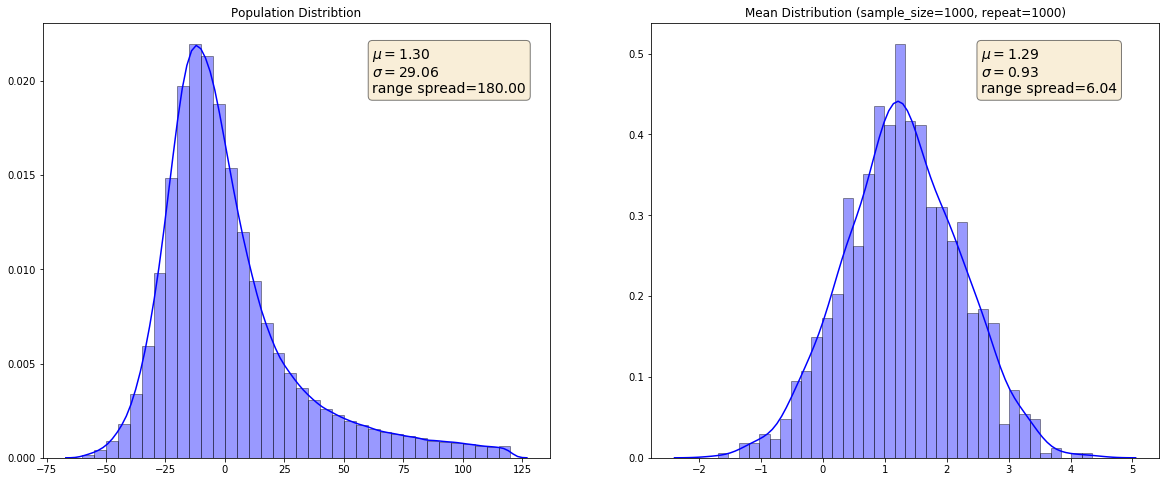

In [375]:
fig = plt.figure(figsize=(20,8))
nrows = 1
ncolms = 2
i=2

plot_hist(population, fig, nrows, ncolms, 1, title='Population Distribtion')
plot_hist(sample_dist, fig, nrows, ncolms, 2, title='Mean Distribution (sample_size=1000, repeat=1000)')
plt.show()

### Observation
1. Population std is 29.06, with range spread around 180.
2. Sampling distribution of mean has std of 0.93, with range spread around 6.04
3. Sampling distribution is less spread than population. 

### Conclusion
From above values, we can easily conclude that sampling distribution of the mean is less spread than the values in the population from which the sample is drawn. Thus, Rule 1 verified.

## Rule 2
The sampling distribution will be well-modeled by a normal distribution (and it will get closer with larger sample sizes)   
**following charts can also be used to prove rule 4**

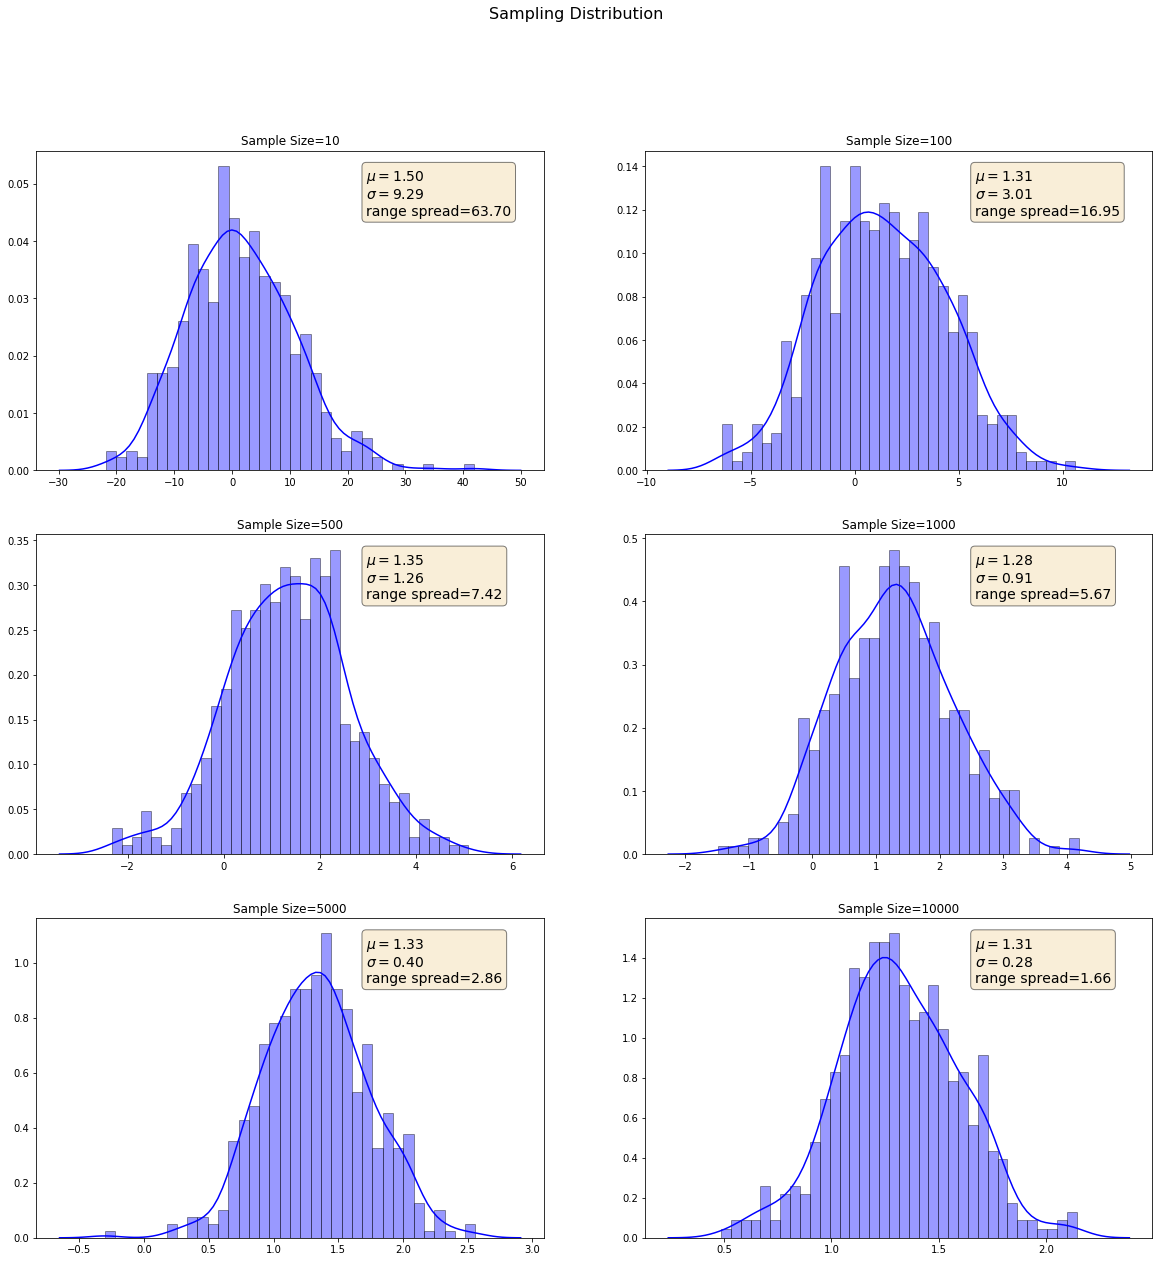

In [378]:
sample_sizes = [10, 100, 500, 1000, 5000, 10000]
n = 500 #repeat sampling for n times

nrows = 3
ncolms = 2
fig = plt.figure(figsize=(20, 20))

for i, size in enumerate(sample_sizes):
    sample = sampling_distribution(population, sample_size=size, repeat=n)
    plot_hist(sample, fig, nrows, ncolms, i+1, title='Sample Size={}'.format(size))

fig.suptitle('Sampling Distribution', fontsize=16)
plt.show()

### Observation
1. All curves are bell shaped
2. There is a symmetric about the mean value, and increases with higher sample size
3. Curves get very similar to a normal distribution as the sample size increases

### Conclusion
From above charts we can easily observe that the sampling distribution is well modeled 
by normal distribution. Thus, Rule 2 verified.

## Rule 3
The spread of the sampling distribution is related to the spread of the population values (mean= μ, std dev = σ/sqrt(n))

In [389]:
sample_sizes = [10, 100, 500, 1000, 5000, 10000]
n = 500 #repeat sampling for n times

for i, size in enumerate(sample_sizes):
    sample = sampling_distribution(population, sample_size=size, repeat=n)
    print('sample_size={}'.format(size).ljust(20),\
          'sample_mean={}'.format(round(sample.mean(),3)).ljust(20),\
          'sample_std_dev={}'.format(round(sample.std(),2)).ljust(20),\
          'σ/sqrt(n)={}'.format(round(population_std/np.sqrt(size),2)))

sample_size=10       sample_mean=1.289    sample_std_dev=9.58  σ/sqrt(n)=9.19
sample_size=100      sample_mean=1.393    sample_std_dev=2.82  σ/sqrt(n)=2.91
sample_size=500      sample_mean=1.319    sample_std_dev=1.27  σ/sqrt(n)=1.3
sample_size=1000     sample_mean=1.258    sample_std_dev=0.92  σ/sqrt(n)=0.92
sample_size=5000     sample_mean=1.309    sample_std_dev=0.42  σ/sqrt(n)=0.41
sample_size=10000    sample_mean=1.286    sample_std_dev=0.28  σ/sqrt(n)=0.29


### Observation
1. sample_mean are very close to population_mean =1.297
2. sample std_dev is almost equal to σ/sqrt(n)

### Conclusion
From above, we can observe that sample_mean is very close to population_mean , and sample std_dev is almost equal to σ/sqrt(n), so sampling distribution is related to the spread of the population values. Thus, Rule 3 verified.

## Rule 4
Bigger samples lead to a smaller spread in the sampling distribution (self evident from std dev = sigma/sqrt(n) )

**We can already observe Rule 4 in Rule 2 charts. But for fun, in this section, sampling distribution will run for n=1000.** 

In [ ]:
#sample_sizes 
min_val = 10
max_val = 30000
incr = 50
sample_size = list(range(min_val,max_val,incr))

#repeat sampling for n times
n = 500 

#std and spread lists
std_lst = []
spread_lst = []

#it can take a long time
for size in sample_size:
    sample = sampling_distribution(population, sample_size=size, repeat=n)
    std = sample.std()
    spread = abs(sample.max()-sample.min())
    std_lst.append(std)
    spread_lst.append(spread)
    print('.', end='')
print('done')

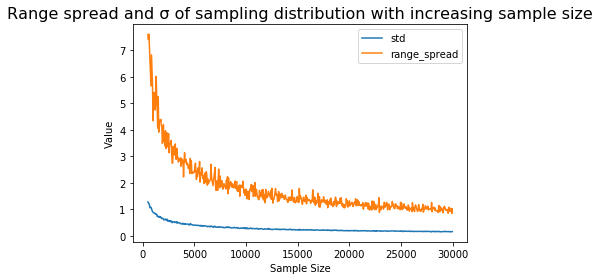

In [59]:
#not using first 10 values for better visualization
plt.plot(sample_size[10:], std_lst[10:], label='std')  
plt.plot(sample_size[10:], spread_lst[10:], label='range_spread')
plt.legend(loc='upper right')
plt.title('Range spread and σ of sampling distribution with increasing sample size', fontsize=16)
plt.xlabel('Sample Size')
plt.ylabel('Value')
plt.show()

### Observation
1. std and range spread decreases as sample size increases
2. sample_size around 10 has the largest values for range_spread and std, where sample_size around 30,000 has the smallest.

### Conclusion
As we increase sample size, standard deviation, variance and range spread decrease. Therefore, we can conclude that the bigger samples lead to a smaller spread in the sampling distribution. Thus, Rule 4 verified.

# Ref

**This notebook was created by Shivam Swarnkar to fullfill Data Lit Assignment 2 requirments. All source code is original, and belongs to the original author.** 